In [1]:
import astropy.units as u
from astropy.coordinates import SkyCoord

In [42]:
import fitsio
from matplotlib import pyplot as plt

In [3]:
import os

In [53]:
btar = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/main/LSS/BGS_ANYtargetsDR9v1.1.1.fits',columns=['RA','DEC'])

In [5]:
dtar = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/main/LSS/LRGtargetsDR9v1.1.1.fits',columns=['RA','DEC'])
bgal = fitsio.read(os.environ['CSCRATCH']+'/bosscat/galaxy_DR12v5_CMASSLOWZTOT_North.fits.gz',columns=['RA','DEC','Z'])

In [25]:
bgals = fitsio.read(os.environ['CSCRATCH']+'/bosscat/galaxy_DR12v5_CMASSLOWZTOT_South.fits.gz',columns=['RA','DEC','Z'])

In [36]:
egaln = fitsio.read(os.environ['CSCRATCH']+'/ebosscat/eBOSS_LRG_clustering_data-NGC-vDR16.fits',columns=['RA','DEC','Z'])
egals = fitsio.read(os.environ['CSCRATCH']+'/ebosscat/eBOSS_LRG_clustering_data-SGC-vDR16.fits',columns=['RA','DEC','Z'])


In [55]:
cbgs = SkyCoord(ra=btar['RA']*u.degree, dec=btar['DEC']*u.degree)

In [6]:
cd = SkyCoord(ra=dtar['RA']*u.degree, dec=dtar['DEC']*u.degree)

In [7]:
cb = SkyCoord(ra=bgal['RA']*u.degree, dec=bgal['DEC']*u.degree)

In [26]:
cbs = SkyCoord(ra=bgals['RA']*u.degree, dec=bgals['DEC']*u.degree)

In [37]:
ces = SkyCoord(ra=egals['RA']*u.degree, dec=egals['DEC']*u.degree)
cen = SkyCoord(ra=egaln['RA']*u.degree, dec=egaln['DEC']*u.degree)

In [8]:
idx, d2d, d3d = cb.match_to_catalog_sky(cd)

In [56]:
idxb, d2db, d3d = cb.match_to_catalog_sky(cbgs)

In [57]:
idxsb, d2dsb, d3d = cbs.match_to_catalog_sky(cbgs)

In [27]:
idxs, d2ds, d3d = cbs.match_to_catalog_sky(cd)

In [38]:
idxes, d2des, d3d = ces.match_to_catalog_sky(cd)
idxen, d2den, d3d = cen.match_to_catalog_sky(cd)

In [9]:
max_sep1 = 1.0 * u.arcsec
max_sep2 = 2.0 * u.arcsec
max_sep5 = 5.0 * u.arcsec

In [11]:
sep_c1 = d2d < max_sep1
print(len(cb[sep_c1]),len(cb))
sep_c2 = d2d < max_sep2
print(len(cb[sep_c2]),len(cb))
sep_c5 = d2d < max_sep5
print(len(cb[sep_c5]),len(cb))

564081 953255
565377 953255
570278 953255


0.2 0.21000000000000002 0.9816783216783217
0.21000000000000002 0.22000000000000003 0.9843837144450641
0.22000000000000003 0.23000000000000004 0.9838154269972452
0.23000000000000004 0.24000000000000005 0.9806594430851684
0.24000000000000005 0.25000000000000006 0.9806916778687523
0.25000000000000006 0.26000000000000006 0.9797807551766139
0.26000000000000006 0.2700000000000001 0.9824838964854786
0.2700000000000001 0.2800000000000001 0.9808569838619922
0.2800000000000001 0.2900000000000001 0.9781344248168893
0.2900000000000001 0.3000000000000001 0.9810865579465405
0.3000000000000001 0.3100000000000001 0.9797376752600633
0.3100000000000001 0.3200000000000001 0.978428719254955
0.3200000000000001 0.3300000000000001 0.9815698656289008
0.3300000000000001 0.34000000000000014 0.9823800307014616
0.34000000000000014 0.35000000000000014 0.983344262295082
0.35000000000000014 0.36000000000000015 0.9773515609059376
0.36000000000000015 0.37000000000000016 0.9720383152556699
0.37000000000000016 0.3800000

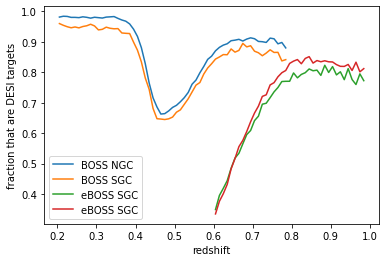

In [61]:
zmin = 0.2

zsep = 0.01
zmax = zmin+zsep#0.3
zl = []
fl = []
while zmax < 0.8:
    selz = bgal['Z'] > zmin
    selz &= bgal['Z'] < zmax
    sep_c1 = d2d < max_sep1
    sep_c1 |= d2db < max_sep1
    print(zmin,zmax,len(cb[sep_c1&selz])/len(cb[selz]))
    zl.append((zmax+zmin)/2.)
    zmin += zsep
    zmax += zsep
    
    fl.append(len(cb[sep_c1&selz])/len(cb[selz]))
plt.plot(zl,fl,label='BOSS NGC')
zmin = 0.2
zmax = zmin+zsep#0.3
#zsep = 0.1
zl = []
fl = []
while zmax < 0.8:
    selz = bgals['Z'] > zmin
    selz &= bgals['Z'] < zmax
    sep_c1 = d2ds < max_sep1
    sep_c1 |= d2dsb < max_sep1

    print(zmin,zmax,len(cbs[sep_c1&selz])/len(cbs[selz]))
    zl.append((zmax+zmin)/2.)
    zmin += zsep
    zmax += zsep
    
    fl.append(len(cbs[sep_c1&selz])/len(cbs[selz]))
plt.plot(zl,fl,label='BOSS SGC')    
zmin = 0.6
zmax = zmin+zsep#0.7
#zsep = 0.1
zl = []
fl = []

while zmax < 1:
    selz = egals['Z'] > zmin
    selz &= egals['Z'] < zmax
    sep_c1 = d2des < max_sep1
    print(zmin,zmax,len(ces[sep_c1&selz])/len(ces[selz]))
    zl.append((zmax+zmin)/2.)
    zmin += zsep
    zmax += zsep
    
    fl.append(len(ces[sep_c1&selz])/len(ces[selz]))
plt.plot(zl,fl,label='eBOSS SGC')    
zmin = 0.6
zmax = zmin+zsep#0.7
#zsep = 0.1
zl = []
fl = []

while zmax < 1:
    selz = egaln['Z'] > zmin
    selz &= egaln['Z'] < zmax
    sep_c1 = d2den < max_sep1
    print(zmin,zmax,len(cen[sep_c1&selz])/len(cen[selz]))
    zl.append((zmax+zmin)/2.)
    zmin += zsep
    zmax += zsep
    
    fl.append(len(cen[sep_c1&selz])/len(cen[selz]))
plt.plot(zl,fl,label='eBOSS SGC')    
plt.legend(loc='lower left')
plt.xlabel('redshift')
plt.ylabel('fraction that are DESI targets')
plt.show()

0.2 0.3 0.9775066672905067
0.30000000000000004 0.4 0.9633362805776599
0.4 0.5 0.49583593787565516
0.2 0.3 0.9479369763397797
0.30000000000000004 0.4 0.9232564306549986
0.4 0.5 0.4896513075965131
0.5 0.6 0.1949942014106732
0.6 0.7 0.08201960405808292
0.7 0.7999999999999999 0.020391324846770392


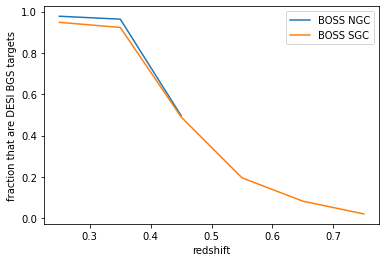

In [58]:
zmin = 0.2
zmax = 0.3
zsep = 0.1
zl = []
fl = []
while zmax < 0.6:
    selz = bgal['Z'] > zmin
    selz &= bgal['Z'] < zmax
    sep_c1 = d2db < max_sep1
    print(zmin,zmax,len(cb[sep_c1&selz])/len(cb[selz]))
    zl.append((zmax+zmin)/2.)
    zmin += zsep
    zmax += zsep
    
    fl.append(len(cb[sep_c1&selz])/len(cb[selz]))
plt.plot(zl,fl,label='BOSS NGC')
zmin = 0.2
zmax = 0.3
zsep = 0.1
zl = []
fl = []
while zmax < 0.8:
    selz = bgals['Z'] > zmin
    selz &= bgals['Z'] < zmax
    sep_c1 = d2dsb < max_sep1
    print(zmin,zmax,len(cbs[sep_c1&selz])/len(cbs[selz]))
    zl.append((zmax+zmin)/2.)
    zmin += zsep
    zmax += zsep
    
    fl.append(len(cbs[sep_c1&selz])/len(cbs[selz]))
plt.plot(zl,fl,label='BOSS SGC')    
zmin = 0.6
 
plt.legend()
plt.xlabel('redshift')
plt.ylabel('fraction that are DESI BGS targets')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


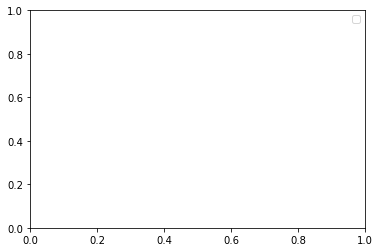

In [39]:
zmin = 0.6
zmax = 0.7
zsep = 0.1
while zmax < 1:
    selz = egals['Z'] > zmin
    selz &= egals['Z'] < zmax
    sep_c1 = d2des < max_sep1
    print(zmin,zmax,len(ces[sep_c1&selz])/len(ces[selz]))
    zmin += zsep
    zmax += zsep

0.6 0.7 0.498040156787457
0.7 0.7999999999999999 0.7168615585902364
0.7999999999999999 0.8999999999999999 0.7995757442762051
0.8999999999999999 0.9999999999999999 0.7918757467144564


In [40]:
zmin = 0.6
zmax = 0.7
zsep = 0.1
while zmax < 1:
    selz = egaln['Z'] > zmin
    selz &= egaln['Z'] < zmax
    sep_c1 = d2den < max_sep1
    print(zmin,zmax,len(cen[sep_c1&selz])/len(cen[selz]))
    zmin += zsep
    zmax += zsep

0.6 0.7 0.5026561691230556
0.7 0.7999999999999999 0.752112394380281
0.7999999999999999 0.8999999999999999 0.8382673330770216
0.8999999999999999 0.9999999999999999 0.8202384177729612


In [19]:
481028/643711

0.7472732328638162

In [23]:
selz = bgal['Z'] > 0.4
sep_c1 = d2d < max_sep5
print(len(cb[sep_c1&selz])/len(cb[selz]))

0.7534430139318743
